
# Ejemplo de Regresión Lineal Múltiple con Gradiente Descendente para una Empresa de Abogados

Este notebook contiene un ejemplo práctico de regresión lineal múltiple utilizando gradiente descendente estocástico para predecir el tiempo de resolución de casos legales en una empresa de abogados.

### Contenido
1. **Generación y Carga de Datos**
2. **Análisis de Correlación**
3. **Entrenamiento del Modelo de Regresión Lineal**
4. **Evaluación del Modelo**
5. **Predicción del Tiempo de Resolución para Nuevos Casos**


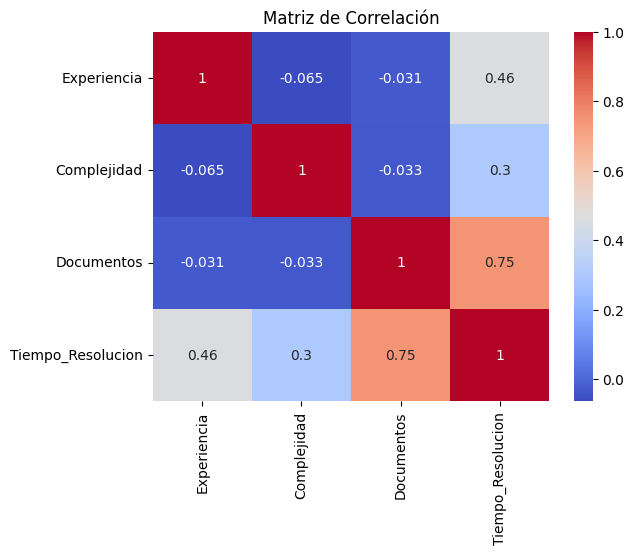

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos ficticios
np.random.seed(42)
n_samples = 1000
experiencia = np.random.randint(1, 30, size=n_samples)  # Años de experiencia del abogado
complejidad = np.random.uniform(1, 10, size=n_samples)  # Complejidad del caso (1-10)
documentos = np.random.randint(10, 1000, size=n_samples)  # Número de documentos involucrados
tiempo_resolucion = 50 + 2 * experiencia + 5 * complejidad + 0.1 * documentos + np.random.randn(n_samples) * 10  # Tiempo de resolución en días

# Crear DataFrame
data = pd.DataFrame({
    'Experiencia': experiencia,
    'Complejidad': complejidad,
    'Documentos': documentos,
    'Tiempo_Resolucion': tiempo_resolucion
})

# Análisis de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# Función para eliminar características altamente correlacionadas
def eliminar_corr_alta(data, umbral=0.75):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    eliminar = [col for col in upper.columns if any(upper[col] > umbral)]
    return data.drop(columns=eliminar)




In [ ]:

# División de los datos para regresión lineal
X = data[['Experiencia', 'Complejidad', 'Documentos']]
y = data['Tiempo_Resolucion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Entrenar el modelo de regresión lineal con SGDRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=1000000, tol=1e-3, learning_rate='optimal'))
])
pipeline.fit(X_train_poly, y_train)
y_pred = pipeline.predict(X_test_poly)

# Evaluar el modelo de regresión lineal
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')


Error Cuadrático Medio (MSE): 179.39089795929038
Coeficiente de Determinación (R^2): 0.8572812269378995


In [ ]:

# Función para predecir el tiempo de resolución de nuevos casos
def predecir_tiempo_resolucion(experiencia, complejidad, documentos):
    nuevo_caso = pd.DataFrame({
        'Experiencia': [experiencia],
        'Complejidad': [complejidad],
        'Documentos': [documentos]
    })
    nuevo_caso_poly = poly_features.transform(nuevo_caso)
    prediccion = pipeline.predict(nuevo_caso_poly)
    return prediccion[0]

# Ejemplo de predicción
experiencia_nueva = 10
complejidad_nueva = 7
documentos_nuevos = 300
print(f'El tiempo de resolución estimado para el nuevo caso es: {predecir_tiempo_resolucion(experiencia_nueva, complejidad_nueva, documentos_nuevos):.2f} días')


El tiempo de resolución estimado para el nuevo caso es: 97.62 días
